In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


#Data Profiling,Preprocessing:

In [ ]:
credit_data=pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0',
                 index_col=False,
                 delimiter=',')
credit_data

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


In [ ]:
# data frame shape
print('Number of rows: ', credit_data.shape[0])
print('Number of columns: ', credit_data.shape[1])

Number of rows:  45000
Number of columns:  43


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [ ]:
# percentage of missing values per feature
print((credit_data.isnull().sum() * 100 / credit_data.shape[0]).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

In [ ]:
credit_data.dropna(subset=['target_default'], inplace=True)

In [ ]:
credit_data.drop('target_fraud', axis=1, inplace=True)

In [ ]:
# number of unique observations per column
credit_data.nunique().sort_values()

channel                                                 1
external_data_provider_credit_checks_last_2_year        1
last_borrowed_in_months                                 2
target_default                                          2
facebook_profile                                        2
external_data_provider_credit_checks_last_year          2
external_data_provider_credit_checks_last_month         4
real_state                                              5
n_defaulted_loans                                       5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts                                             44
state         

In [ ]:
# drop the columns "channel" and "external_data_provider_credit_checks_last_2_year"
credit_data.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

In [ ]:
credit_data.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

In [ ]:
# show descriptive statistics
credit_data.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


In [ ]:
# count of "inf" values in "reported_income"
np.isinf(credit_data['reported_income']).sum()

66

In [ ]:
# count of values = -999 in "external_data_provider_email_seen_before"
credit_data.loc[credit_data['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before']

28      -999.0
38      -999.0
118     -999.0
134     -999.0
357     -999.0
         ...  
44295   -999.0
44317   -999.0
44475   -999.0
44485   -999.0
44804   -999.0
Name: external_data_provider_email_seen_before, Length: 591, dtype: float64

In [ ]:
credit_data.loc[credit_data['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'].value_counts()

-999.0    591
Name: external_data_provider_email_seen_before, dtype: int64

In [ ]:
# replace "inf" values with "nan"
credit_data['reported_income'] = credit_data['reported_income'].replace(np.inf, np.nan)

# replace "-999" values with "nan"
credit_data.loc[credit_data['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan

In [ ]:
# data frame containing numerical features
credit_data_numerical = credit_data[['score_3', 'risk_rate', 'last_amount_borrowed',
                                 'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since',
                                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
                                 'external_data_provider_email_seen_before']]

In [ ]:
df_credit_num = credit_data.select_dtypes(exclude='object').columns
df_credit_cat = credit_data.select_dtypes(include='object').columns

# fill missing values for "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
credit_data['last_amount_borrowed'].fillna(value=0, inplace=True)
credit_data['last_borrowed_in_months'].fillna(value=0, inplace=True)
credit_data['n_issues'].fillna(value=0, inplace=True)

# fill missing values for numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(credit_data.loc[:, df_credit_num])
credit_data.loc[:, df_credit_num] = imputer.transform(credit_data.loc[:, df_credit_num])

# fill missing values for categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(credit_data.loc[:, df_credit_cat])
credit_data.loc[:, df_credit_cat] = imputer.transform(credit_data.loc[:, df_credit_cat])

<ipython-input-91-62f6bd1517ec>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  credit_data.loc[:, df_credit_num] = imputer.transform(credit_data.loc[:, df_credit_num])
<ipython-input-91-62f6bd1517ec>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  credit_data.loc[:, df_credit_cat] = imputer.transform(credit_data.loc[:, df_credit_cat])


In [ ]:
credit_data.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  bool   
 1   score_1                                          41741 non-null  object 
 2   score_2                                          41741 non-null  object 
 3   score_3                                          41741 non-null  float64
 4   score_4                                          41741 non-null  float64
 5   score_5                                          41741 non-null  float64
 6   score_6                                          41741 non-null  float64
 7   risk_rate                                        41741 non-null  float64
 8   last_amount_borrowed                             41741 non-null  float64
 9   last_borrowed_in_months     

In [ ]:
credit_data

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,18.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,BR-MT
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,...,0.0,14.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,BR-RS
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,10.0,0.0,6.0,2.0,1.0,9.0,65.0,163679.0,BR-RR
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,...,0.0,19.0,19.0,406.0,3.0,1.0,38.0,815.0,1086.0,BR-RN
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,...,0.0,11.0,0.0,240.0,2.0,1.0,46.0,320.0,198618.0,BR-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,36.0,...,0.0,7.0,7.0,72.0,2.0,1.0,7.0,730.0,73417.0,BR-GO
44996,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,0.00,0.0,...,0.0,16.0,16.0,51.0,1.0,1.0,1.0,28.0,26246.0,BR-RO
44997,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,0.00,0.0,...,0.0,6.0,6.0,476.0,2.0,1.0,27.0,940.0,101252.0,BR-SP
44998,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,0.00,0.0,...,0.0,10.0,10.0,35.0,0.0,1.0,2.0,459.0,129844.0,BR-SP


In [ ]:
credit_data.to_csv("credit.csv")

#Causal Features Analysis

In [ ]:
!pip install dowhy

In [ ]:
causal_graph = """
digraph {
    risk_rate;
    income;
    target_default;
    last_amount_borrowed;
    credit_limit;
    n_bankruptcies;
    n_defaulted_loans;
    external_data_provider_fraud_score;
    external_data_provider_credit_checks_last_year;
    U[label="Unobserved Confounders"];
    income -> risk_rate;
    U -> risk_rate;
    U -> income;
    U -> target_default;
    U -> n_defaulted_loans;
    n_bankruptcies -> risk_rate;
    n_defaulted_loans -> risk_rate;
    credit_limit -> risk_rate;
    target_default -> risk_rate;
    last_amount_borrowed -> risk_rate;
}
"""


In [ ]:
from dowhy import CausalModel

In [ ]:
credit_data_causal= credit_data[['risk_rate', 'target_default', 'last_amount_borrowed', 'credit_limit', 'income', 'n_bankruptcies', 'n_defaulted_loans','external_data_provider_fraud_score','external_data_provider_credit_checks_last_year']
].copy()


In [ ]:
credit_data_causal

,risk_rate,target_default,last_amount_borrowed,credit_limit,income,n_bankruptcies,n_defaulted_loans,external_data_provider_fraud_score,external_data_provider_credit_checks_last_year
0,0.40,False,25033.92,0.0,65014.12,0.0,0.0,645.0,0.0
1,0.24,False,0.00,39726.0,100018.91,0.0,0.0,243.0,0.0
2,0.29,True,7207.92,25213.0,65023.65,0.0,0.0,65.0,1.0
3,0.32,False,0.00,54591.0,68830.01,1.0,0.0,815.0,1.0
4,0.18,False,0.00,25213.0,60011.29,0.0,0.0,320.0,1.0
...,...,...,...,...,...,...,...,...,...
44995,0.17,False,14766.42,10627.0,100013.24,0.0,0.0,730.0,1.0
44996,0.27,False,0.00,36262.0,95026.69,0.0,0.0,28.0,1.0
44997,0.30,False,0.00,0.0,106020.90,0.0,0.0,940.0,1.0
44998,0.37,True,0.00,0.0,185018.07,0.0,0.0,459.0,1.0


In [ ]:
credit_data_causal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   risk_rate                                       41741 non-null  float64
 1   target_default                                  41741 non-null  bool   
 2   last_amount_borrowed                            41741 non-null  float64
 3   credit_limit                                    41741 non-null  float64
 4   income                                          41741 non-null  float64
 5   n_bankruptcies                                  41741 non-null  float64
 6   n_defaulted_loans                               41741 non-null  float64
 7   external_data_provider_fraud_score              41741 non-null  float64
 8   external_data_provider_credit_checks_last_year  41741 non-null  float64
dtypes: bool(1), float64(8)
memory usage: 2.9

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
Exception ignored in: <function _xla_gc_callback at 0x7e5b77f639a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/dowhy/causal_model.py:582: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


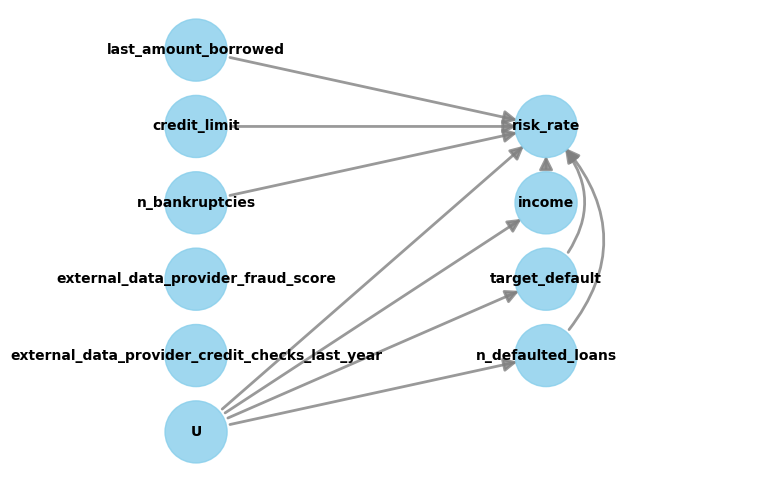

In [ ]:
model= CausalModel(
        data = credit_data_causal,
        graph=causal_graph.replace("\n", " "),
        treatment='n_bankruptcies',
        outcome='risk_rate')
model.view_model()


In [ ]:
# from IPython.display import Image, display
# display(Image(filename="causal_model.png"))

In [ ]:
#Identify the causal effect
estimands = model.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                     
─────────────────(E[riskᵣₐₜₑ])
d[n_bankruptcies]             
Estimand assumption 1, Unconfoundedness: If U→{n_bankruptcies} and U→risk_rate then P(risk_rate|n_bankruptcies,,U) = P(risk_rate|n_bankruptcies,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [ ]:
credit_data_causal

,risk_rate,target_default,last_amount_borrowed,credit_limit,income,n_bankruptcies,n_defaulted_loans,external_data_provider_fraud_score,external_data_provider_credit_checks_last_year
0,0.40,False,25033.92,0.0,65014.12,0.0,0.0,645.0,0.0
1,0.24,False,0.00,39726.0,100018.91,0.0,0.0,243.0,0.0
2,0.29,True,7207.92,25213.0,65023.65,0.0,0.0,65.0,1.0
3,0.32,False,0.00,54591.0,68830.01,1.0,0.0,815.0,1.0
4,0.18,False,0.00,25213.0,60011.29,0.0,0.0,320.0,1.0
...,...,...,...,...,...,...,...,...,...
44995,0.17,False,14766.42,10627.0,100013.24,0.0,0.0,730.0,1.0
44996,0.27,False,0.00,36262.0,95026.69,0.0,0.0,28.0,1.0
44997,0.30,False,0.00,0.0,106020.90,0.0,0.0,940.0,1.0
44998,0.37,True,0.00,0.0,185018.07,0.0,0.0,459.0,1.0


#Model 4: Causal Features + Regression (Catboost & Multi Layer Perceptron)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

causal_data = credit_data_causal

# Encode boolean column
causal_data['target_default'] = causal_data['target_default'].astype(int)

# Scaling features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(causal_data.drop(columns=['risk_rate']))

causal_data_scaled = pd.DataFrame(scaled_features, columns=causal_data.columns[:-1])
causal_data_scaled['target_default'] = causal_data['target_default']

# Splitting data into train and test sets
train, test = train_test_split(causal_data_scaled, test_size=0.2, random_state=200)

# Causal Feature Selection
features = ['last_amount_borrowed', 'credit_limit', 'income', 'n_bankruptcies', 'n_defaulted_loans',
            'external_data_provider_fraud_score']


catboost_model = CatBoostRegressor()

# Fitting the model
catboost_model.fit(train[features], train['risk_rate'])

y_pred = catboost_model.predict(test[features])

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test['risk_rate'], y_pred))
print("Root Mean Squared Error (RMSE):", rmse)



Learning rate set to 0.071271
0:	learn: 0.7346709	total: 5.86ms	remaining: 5.85s
1:	learn: 0.7344897	total: 11.3ms	remaining: 5.66s
2:	learn: 0.7343189	total: 16.5ms	remaining: 5.48s
3:	learn: 0.7341686	total: 21.5ms	remaining: 5.36s
4:	learn: 0.7339974	total: 26.6ms	remaining: 5.29s
5:	learn: 0.7338358	total: 31.8ms	remaining: 5.27s
6:	learn: 0.7336891	total: 37ms	remaining: 5.25s
7:	learn: 0.7335961	total: 47.3ms	remaining: 5.86s
8:	learn: 0.7334996	total: 55.9ms	remaining: 6.15s
9:	learn: 0.7334245	total: 66.3ms	remaining: 6.57s
10:	learn: 0.7332656	total: 71.8ms	remaining: 6.45s
11:	learn: 0.7331892	total: 76.7ms	remaining: 6.32s
12:	learn: 0.7331226	total: 81.6ms	remaining: 6.19s
13:	learn: 0.7330448	total: 86.5ms	remaining: 6.09s
14:	learn: 0.7329347	total: 91.7ms	remaining: 6.02s
15:	learn: 0.7328761	total: 96.8ms	remaining: 5.95s
16:	learn: 0.7328026	total: 102ms	remaining: 5.9s
17:	learn: 0.7327754	total: 106ms	remaining: 5.77s
18:	learn: 0.7327131	total: 111ms	remaining: 5.72

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

causal_data = credit_data_causal

# Encode boolean column
causal_data['target_default'] = causal_data['target_default'].astype(int)

# Scaling features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(causal_data.drop(columns=['risk_rate']))

causal_data_scaled = pd.DataFrame(scaled_features, columns=causal_data.columns[:-1])
causal_data_scaled['target_default'] = causal_data['target_default']

# Splitting data into train and test sets
train, test = train_test_split(causal_data_scaled, test_size=0.2, random_state=200)

# Causal Feature Selection for MLP
features = ['last_amount_borrowed', 'credit_limit', 'income', 'n_bankruptcies', 'n_defaulted_loans',
            'external_data_provider_fraud_score']

# Creating ANN-MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(train[features], train['risk_rate'], epochs=50, batch_size=32, verbose=1)

# Prediction on test data
y_pred = model.predict(test[features]).flatten()

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test['risk_rate'], y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Epoch 1/50
1044/1044 [==============================] - 4s 2ms/step - loss: 0.5454
Epoch 2/50
1044/1044 [==============================] - 4s 4ms/step - loss: 0.5432
Epoch 3/50
1044/1044 [==============================] - 6s 5ms/step - loss: 0.5427
Epoch 4/50
1044/1044 [==============================] - 7s 6ms/step - loss: 0.5418
Epoch 5/50
1044/1044 [==============================] - 9s 9ms/step - loss: 0.5418
Epoch 6/50
1044/1044 [==============================] - 8s 8ms/step - loss: 0.5414
Epoch 7/50
1044/1044 [==============================] - 7s 6ms/step - loss: 0.5407
Epoch 8/50
1044/1044 [==============================] - 9s 9ms/step - loss: 0.5412
Epoch 9/50
1044/1044 [==============================] - 5s 5ms/step - loss: 0.5410
Epoch 10/50
1044/1044 [==============================] - 2s 2ms/step - loss: 0.5410
Epoch 11/50
1044/1044 [==============================] - 2s 2ms/step - loss: 0.5410
Epoch 12/50
1044/1044 [==============================] - 3s 2ms/step - loss: 0.5409
E

## Hyperparameter Tuning

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

causal_data = credit_data_causal

# Encode boolean column
causal_data['target_default'] = causal_data['target_default'].astype(int)

# Scaling features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(causal_data.drop(columns=['risk_rate']))

causal_data_scaled = pd.DataFrame(scaled_features, columns=causal_data.columns[:-1])
causal_data_scaled['target_default'] = causal_data['target_default']

# Splitting data into train and test sets
train, test = train_test_split(causal_data_scaled, test_size=0.2, random_state=200)

# Causal Feature Selection
features = ['last_amount_borrowed', 'credit_limit', 'income', 'n_bankruptcies', 'n_defaulted_loans',
            'external_data_provider_fraud_score']

catboost_model = CatBoostRegressor()

# Defining the hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

# Hyperparameter Tuning - RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_model, param_distributions=param_grid, n_iter=20, scoring='neg_mean_squared_error', cv=10, verbose=2, random_state=222, n_jobs=-1)
random_search.fit(train[features], train['risk_rate'])

# best estimator
best_model = random_search.best_estimator_

# Prediction on test data
y_pred = best_model.predict(test[features])

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test['risk_rate'], y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Best parameters
print("Best parameters:", random_search.best_params_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
0:	learn: 0.7348616	total: 13.6ms	remaining: 4.06s
1:	learn: 0.7348368	total: 27.4ms	remaining: 4.09s
2:	learn: 0.7348104	total: 40.4ms	remaining: 4s
3:	learn: 0.7347790	total: 49.3ms	remaining: 3.65s
4:	learn: 0.7347485	total: 58.3ms	remaining: 3.44s
5:	learn: 0.7347253	total: 74.2ms	remaining: 3.64s
6:	learn: 0.7347046	total: 84.3ms	remaining: 3.53s
7:	learn: 0.7346786	total: 91.7ms	remaining: 3.35s
8:	learn: 0.7346539	total: 103ms	remaining: 3.32s
9:	learn: 0.7346340	total: 110ms	remaining: 3.18s
10:	learn: 0.7346125	total: 118ms	remaining: 3.11s
11:	learn: 0.7345862	total: 134ms	remaining: 3.22s
12:	learn: 0.7345632	total: 141ms	remaining: 3.11s
13:	learn: 0.7345438	total: 147ms	remaining: 3s
14:	learn: 0.7345210	total: 157ms	remaining: 2.98s
15:	learn: 0.7344992	total: 168ms	remaining: 2.98s
16:	learn: 0.7344773	total: 179ms	remaining: 2.98s
17:	learn: 0.7344567	total: 186ms	remaining: 2.91s
18:	learn: 0.7344362	total: